# DATA ENGINEERING + LOGISTIC REGRESSION FROM SCRATCH

## 1. DATA ENGINEERING:
**- In this part, I used the Titanic dataset to predict the survival of its passenger by exploring and create new data based on the original ones.**

In [1]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings 
import h5py
warnings.simplefilter("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Some highlights:
- As we can see so far, factors that most correlated with survival are Pclass and Fare.
- There are other factors are not showed here due to they are not numerical values, so we're lacking the view of how sex related to survival.

In [6]:
# Let change categorical values into numerical values

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
# Age data is missing, let's fill them with median age.

df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Sex_male       891 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(1)
memory usage: 77.6+ KB


In [8]:
# Let's create some new data based on the original ones and see how them related to survival

df['Alone'] = 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Alone,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0,1,2
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,1,4
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1,1,1


In [9]:
# If you are alone, so the label is 1, no is 0.

df['Alone'][df['FamilySize'] > 1 ] = 0
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Alone,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0,0,2
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,1,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,4
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1,1,1


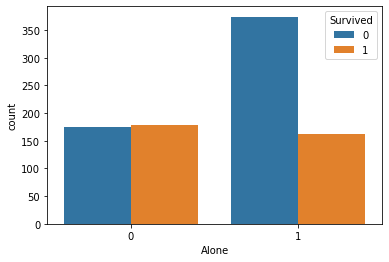

In [10]:
sns.countplot(x='Alone', hue='Survived', data=df)

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Alone,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.271832,0.217138
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,0.303646,-0.200988
Alone,0.057462,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.303646,1.000000,-0.690922
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,-0.200988,-0.690922,1.000000


### Some highlights:
- Now we get a much better view on how other factors related to survival.
- Sex is the most correlated factor, follow by Pclass, Alone.

In [73]:
# Let's split x and y for training purpose

X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone', 'Sex_male']]
y = df['Survived']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
prediction = model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f'Accuracy score: {accuracy_score(y_test, prediction)}')

Accuracy score: 0.7988826815642458


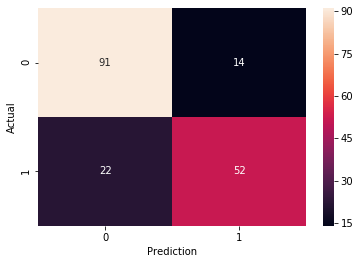

In [81]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Conclusion:
- Just by some simple data engineering, I was able to lift up the accuracy score from 73% to almost 80%.
- The recall score let's us know how much that we predict each classes correctly in comparison with reality
- The precision score showed how many percent that we're correct per the number we predict each classes. 
==> You can see here our precision and recall scores are quite similar, which is good since there are not a big gap between what we predict and reality is.

## Logistic Regression from scratch
- In this part, let's build Logistic Regression of my own to better understanding how it's work when we apply libraries like SKlearn, and it's will also give us more flexibility to improve our model.

In [55]:
# Let's focus on OOP here

class LogisticRegression():
    ''' Logistic Regresion Classifier using gradient ifier using gradient descent
    Parameter:
        learning_rate
        iterations
        
    Attributes:
        weight
        bias
    '''
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.costs = np.array([])
        
    def initialize_params(self, n):
        self.w = np.zeros((n,1), dtype=np.float64)
        self.b = np.zeros((1,1), dtype=np.float64)
        
    def process(self, X, y):
        ''' Implement one step iteration'''
        
        m = X.shape[0]
        Z = np.dot(X, self.w) + self.b
        A = self.sigmoid(Z)
        
        self.costs = np.append(self.costs, self.cost(A, y) )
        dw = (1/m) * np.dot(X.T, (A-y))
        db = (1/m) * np.sum(A-y, keepdims=True)
        
        return dw, db

    def cost(self, A, Y):
        m = Y.shape[0]
        cost = (-1/m) * ( np.dot(Y.T, np.log(A)) + np.dot((1-Y).T, np.log(1-A)) )
        return cost
    
    def fit(self, X, y):
        ''' Fit training data and train the model
        parameters:
            x: training data
            y: target values
        '''
        
        self.initialize_params(X.shape[1])
        
        for i in range(self.iterations):
            dw, db = self.process(X, y)
            
            self.w = self.w - self.learning_rate*dw
            self.b = self.b - self.learning_rate*db
            
            if (i%500 == 0):
                print(f'Iteration {i}: Cost: {self.costs[-1]}')
        self.costs.reshape((1,-1))
    
    def sigmoid(self, z):
        return 1. / (1+np.exp(-z))
    
    def predict(self, X):
        ''' Foward propagation, predictions
        '''
        m = X.shape[0]
        Z = np.dot(X, self.w) + self.b
        A = self.sigmoid(Z)
        
        predictions = A[:, 0] > 0.5
        return predictions

### CAT VS NON-CAT DATA:
- I will use h5py cat data for this practice.

In [82]:
# Let's load the data

def load_dataset():
    train_dataset = h5py.File('catvnoncat-20200201T040844Z-001/catvnoncat/train_catvnoncat.h5')
    train_set_x = np.array(train_dataset['train_set_x'][:])
    train_set_y = np.array(train_dataset['train_set_y'][:])
    
    test_dataset = h5py.File('catvnoncat-20200201T040844Z-001/catvnoncat/test_catvnoncat.h5')
    test_set_x = np.array(test_dataset['test_set_x'][:])
    test_set_y = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    train_set_y = train_set_y.reshape(1, train_set_y.shape[0])
    test_set_y = test_set_y.reshape(1, test_set_y.shape[0])
    
    return train_set_x, train_set_y, test_set_x, test_set_y, classes

x_train, y_train, x_test, y_test, classes = load_dataset()

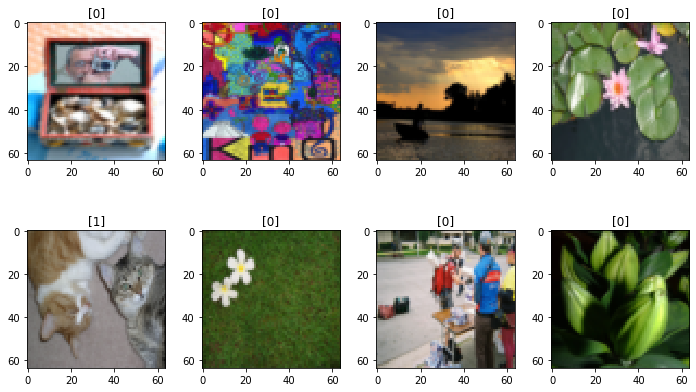

In [95]:
# Show img
cols = 4 
rows = 2
plt.figure(figsize=(12,12))
for i in range (1, cols*rows+1):
    plt.subplot(rows,cols,i)
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.5)
    index = np.random.randint(0, len(x_train))
    plt.imshow(x_train[index])
    plt.title(y_train[:,index])
plt.show()

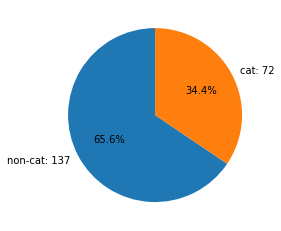

In [27]:
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(x=counts, labels = ['non-cat: %s' % counts[0],'cat: %s' % counts[1]], startangle=90, autopct = '%1.1f%%')
plt.show()

In [36]:
# Convert to 2d array
X_train = x_train.reshape((len(x_train), -1))
Y_train = y_train.reshape(-1, (len(y_train)))

X_test = x_test.reshape((len(x_test), -1))
Y_test = y_test.reshape(-1, (len(y_test)))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

# Normalization

X_train = X_train / 255
X_test = X_test / 255

(209, 12288) (209, 1) (50, 12288) (50, 1)


## Training model

In [56]:
model = LogisticRegression(iterations=5001)
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

# Show metrics
print('Accuracy score: %f' % accuracy_score(Y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, predictions))

Iteration 0: Cost: 0.6931471805599453
Iteration 500: Cost: 0.4878798632171657
Iteration 1000: Cost: 0.41816382093643273
Iteration 1500: Cost: 0.3704706898360003
Iteration 2000: Cost: 0.3343262415502277
Iteration 2500: Cost: 0.30545963120192193
Iteration 3000: Cost: 0.28162505251428005
Iteration 3500: Cost: 0.26147941158452703
Iteration 4000: Cost: 0.24415114650144545
Iteration 4500: Cost: 0.2290412599906218
Iteration 5000: Cost: 0.21572006239498256
Accuracy score: 0.740000
Confusion Matrix:
[[13  4]
 [ 9 24]]


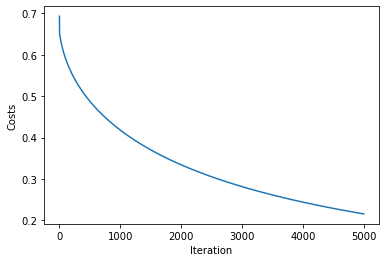

In [59]:
# Plot cost per iteration
iterations = len(model.costs)
plt.plot(list(range(iterations)), model.costs)
plt.xlabel('Iteration')
plt.ylabel('Costs')
plt.show()